In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

Read the data:

In [2]:
data=pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


Perform the EDA

In [3]:
data.shape

(517, 31)

In [4]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [8]:
def custom_map(day):
    day_mapping = {
        "sun": 1, "mon": 2, "tue": 3, "wed": 4, "thu": 5, "fri": 6,
        "sat": 7
    }
    return day_mapping.get(day.lower(), None)
data['day'] = data['day'].apply(custom_map)

In [9]:
def custom_map(month):
    month_mapping = {
        "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
        "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
    }
    return month_mapping.get(month.lower(), None)
data['month'] = data['month'].apply(custom_map)

In [10]:
data['size_category']=le.fit_transform(data['size_category'])

In [11]:
fire = data.loc[:, ['month', 'day', 'FFMC','DMC','DC','ISI','temp','RH','wind','rain','size_category']]
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


In [12]:
fire.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [13]:
fire[fire.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
53,8,4,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,1
100,8,1,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,1
159,9,6,92.4,117.9,668.0,12.2,19.0,34,5.8,0.0,1
166,8,4,92.1,111.2,654.1,9.6,16.6,47,0.9,0.0,1
179,8,3,88.8,147.3,614.5,9.0,14.4,66,5.4,0.0,1
194,8,3,94.8,108.3,647.1,17.0,24.6,22,4.5,0.0,0
215,3,7,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,0
222,3,2,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,0
277,12,2,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,0
278,12,2,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,0


In [14]:
fire.drop_duplicates(inplace=True)
fire.reset_index(drop=True,inplace=True)

In [15]:
fire.isnull()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
493,False,False,False,False,False,False,False,False,False,False,False
494,False,False,False,False,False,False,False,False,False,False,False
495,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False


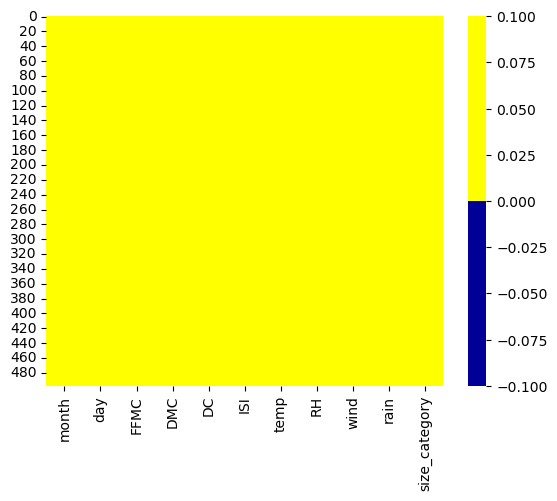

In [16]:
colours = ['#000099', '#ffff00'] 
pal = sns.color_palette(colours)
sns.heatmap(fire.isnull(), cmap=pal)
plt.show()

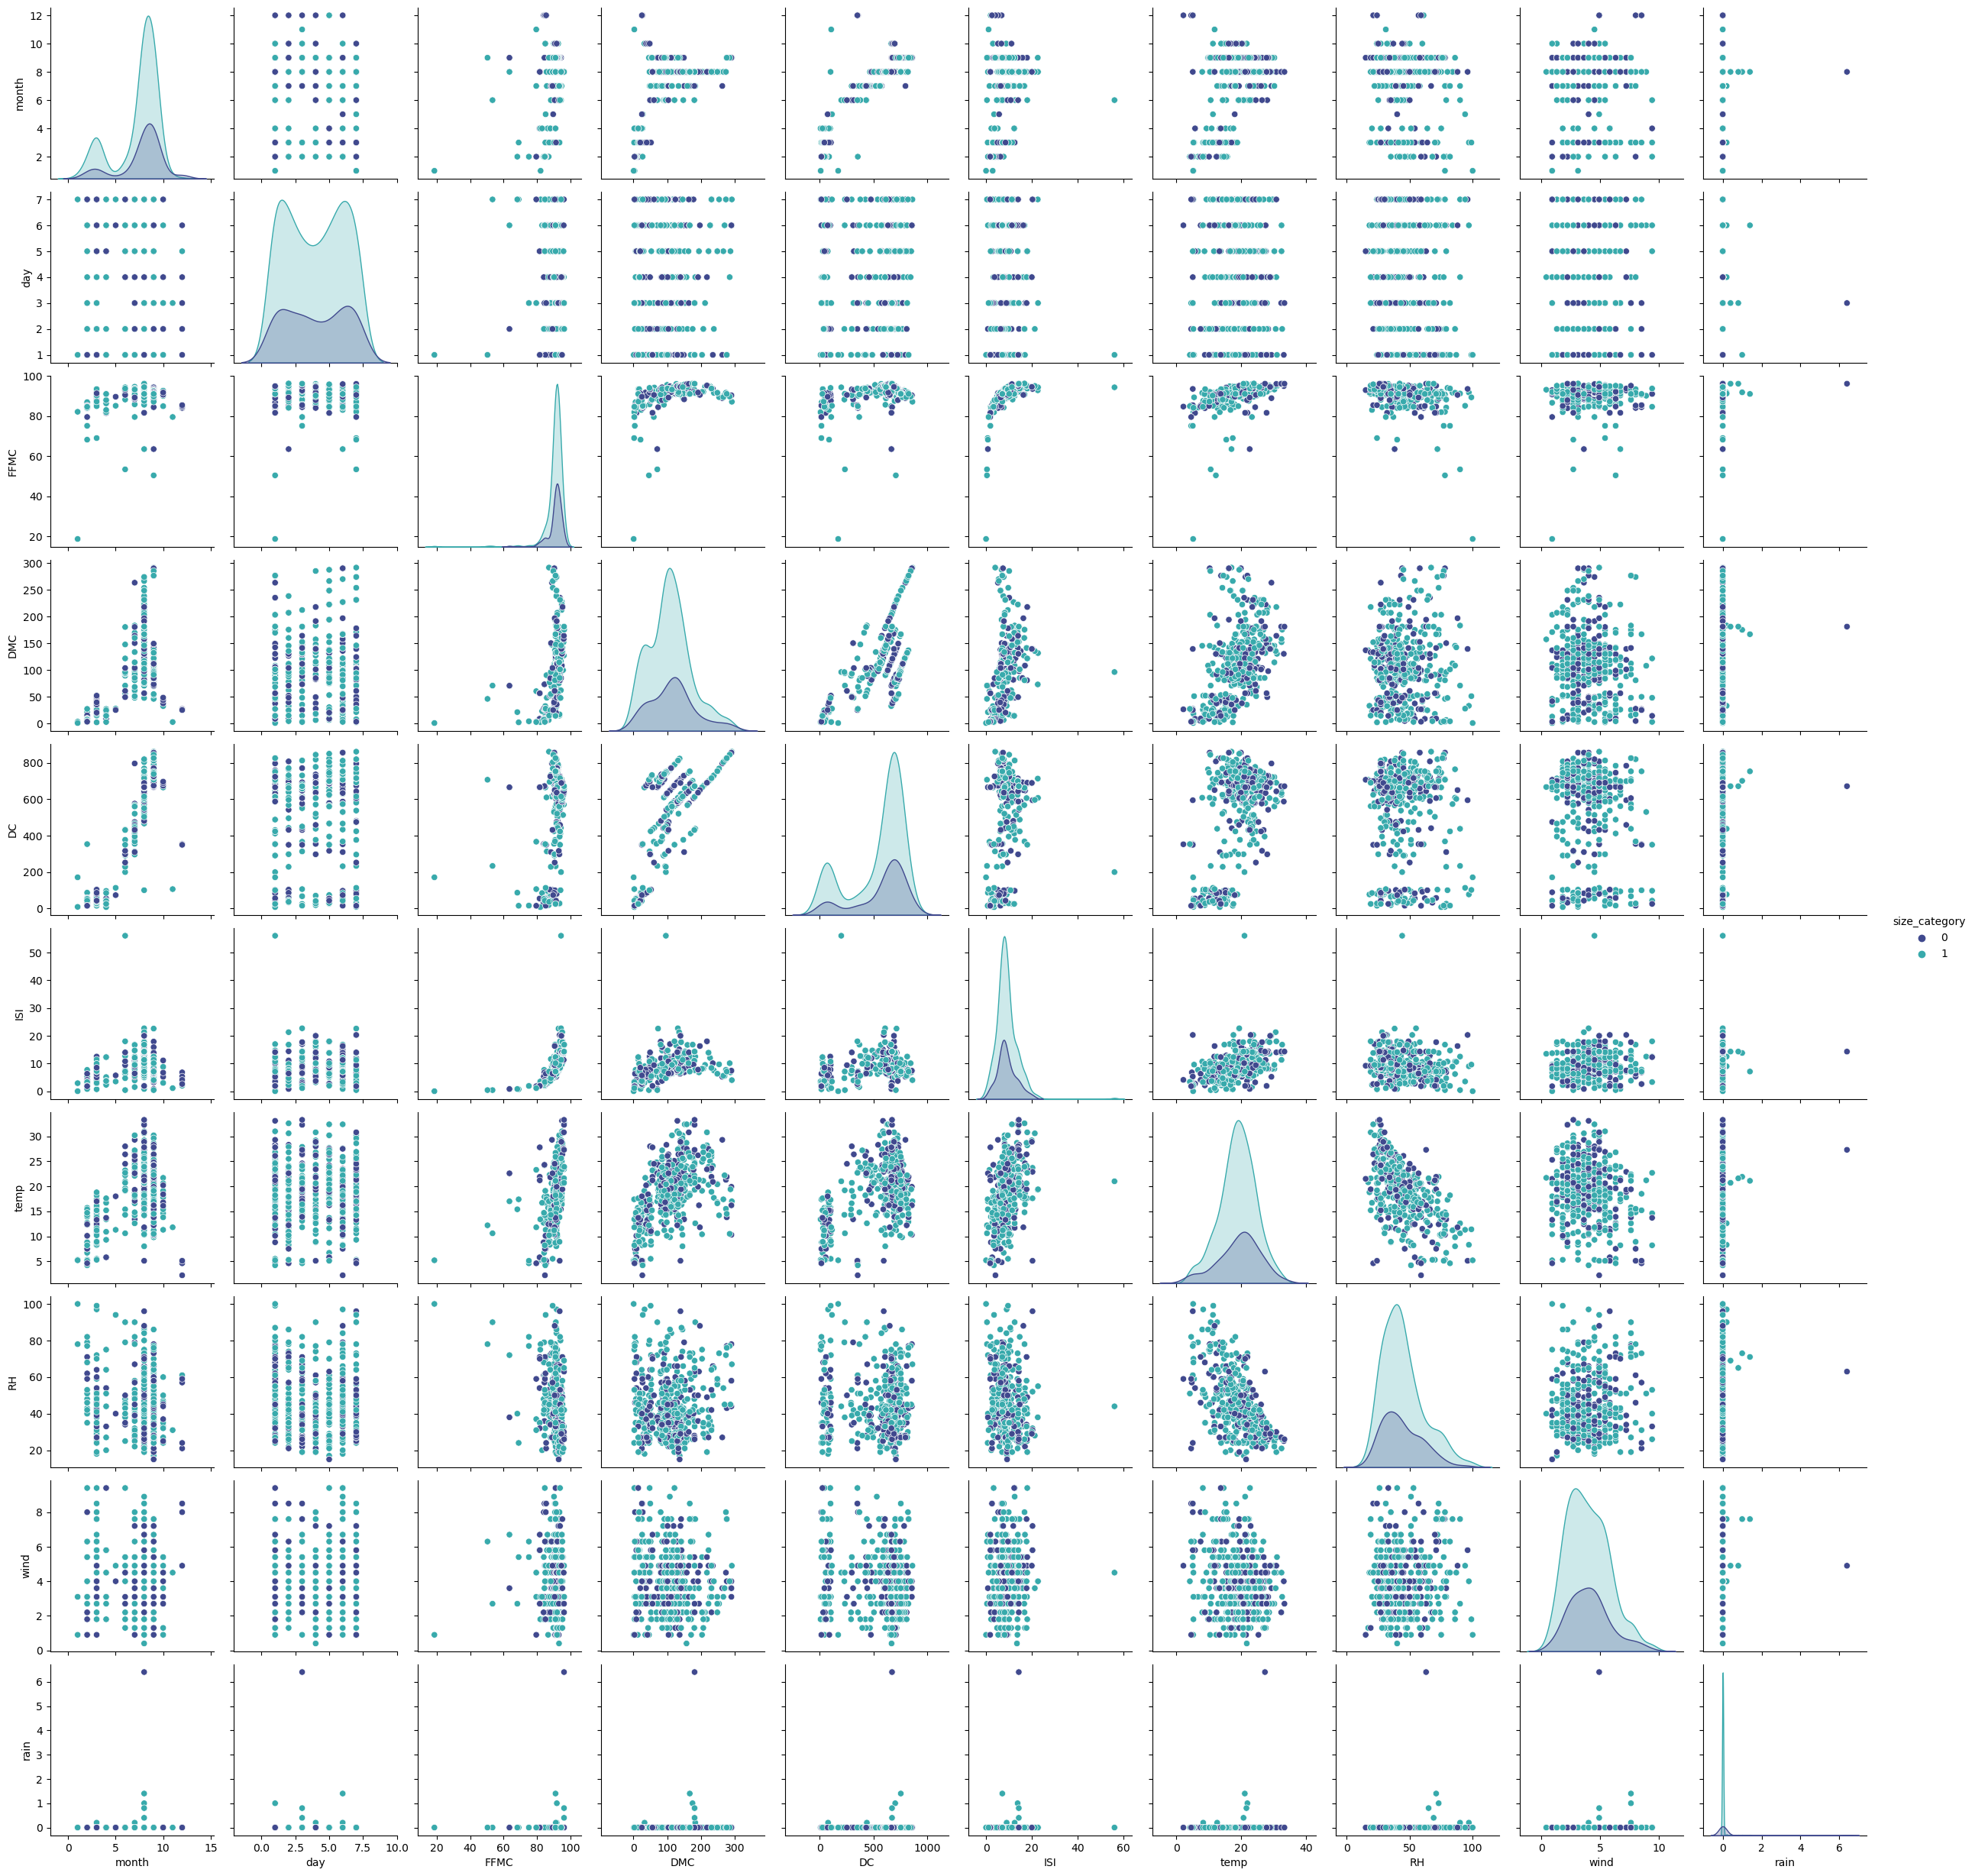

In [17]:
sns.pairplot(fire,palette='mako', hue='size_category')
plt.show()

In [18]:
fire.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
month,1.000000,-0.026736,0.306928,0.490742,0.889129,0.203692,0.411143,-0.089898,-0.115173,0.013387,-0.080438
day,-0.026736,1.000000,0.065803,0.013037,-0.003352,0.032197,0.019710,-0.099733,0.008558,-0.022087,-0.009033
FFMC,0.306928,0.065803,1.000000,0.378272,0.327011,0.528125,0.427600,-0.319241,-0.015637,0.052313,-0.034921
DMC,0.490742,0.013037,0.378272,1.000000,0.681262,0.303506,0.465194,0.047667,-0.089319,0.071385,-0.067127
DC,0.889129,-0.003352,0.327011,0.681262,1.000000,0.222965,0.497994,-0.059315,-0.192634,0.033993,-0.045853
ISI,0.203692,0.032197,0.528125,0.303506,0.222965,1.000000,0.383404,-0.145917,0.129018,0.062353,-0.003271
temp,0.411143,0.019710,0.427600,0.465194,0.497994,0.383404,1.000000,-0.564114,-0.199862,0.068113,-0.033196
RH,-0.089898,-0.099733,-0.319241,0.047667,-0.059315,-0.145917,-0.564114,1.000000,0.095462,0.095560,0.017728
wind,-0.115173,0.008558,-0.015637,-0.089319,-0.192634,0.129018,-0.199862,0.095462,1.000000,0.062040,-0.031627
rain,0.013387,-0.022087,0.052313,0.071385,0.033993,0.062353,0.068113,0.095560,0.062040,1.000000,-0.054950


[]

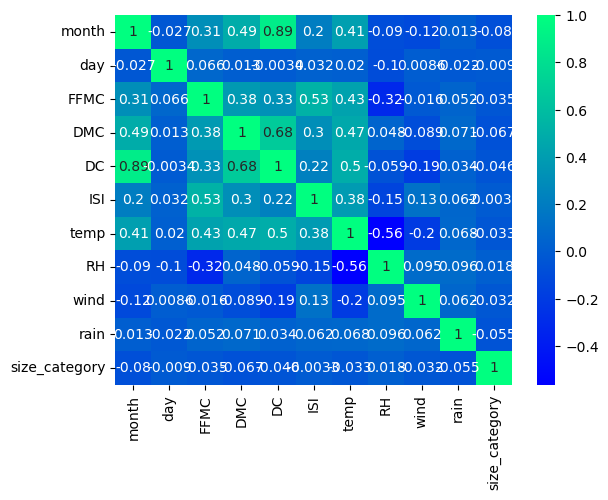

In [19]:
sns.heatmap(fire.corr(), cmap='winter', annot=True)
plt.plot()

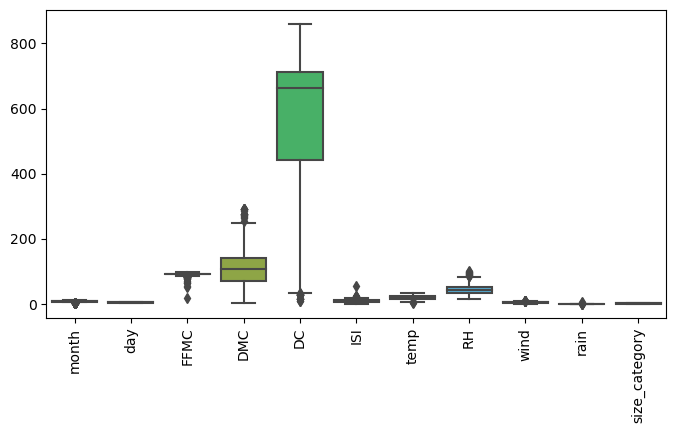

In [20]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data = fire)
plt.xticks(rotation=90)
plt.show()

Visualization

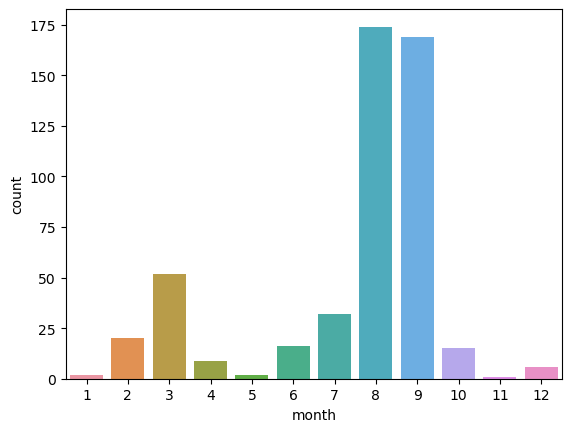

8     174
9     169
3      52
7      32
2      20
6      16
10     15
4       9
12      6
1       2
5       2
11      1
Name: month, dtype: int64

In [21]:
sns.countplot(x='month',data= fire)
plt.xlabel('month')
plt.ylabel('count')
plt.show()
fire['month'].value_counts()

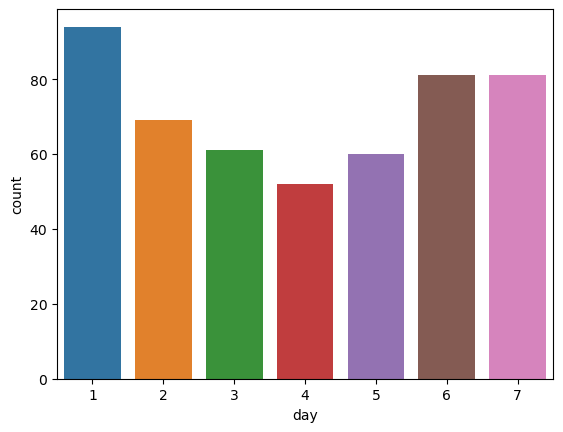

1    94
6    81
7    81
2    69
3    61
5    60
4    52
Name: day, dtype: int64

In [22]:
sns.countplot(x='day',data= fire)
plt.xlabel('day')
plt.ylabel('count')
plt.show()
fire['day'].value_counts()

<Axes: xlabel='RH'>

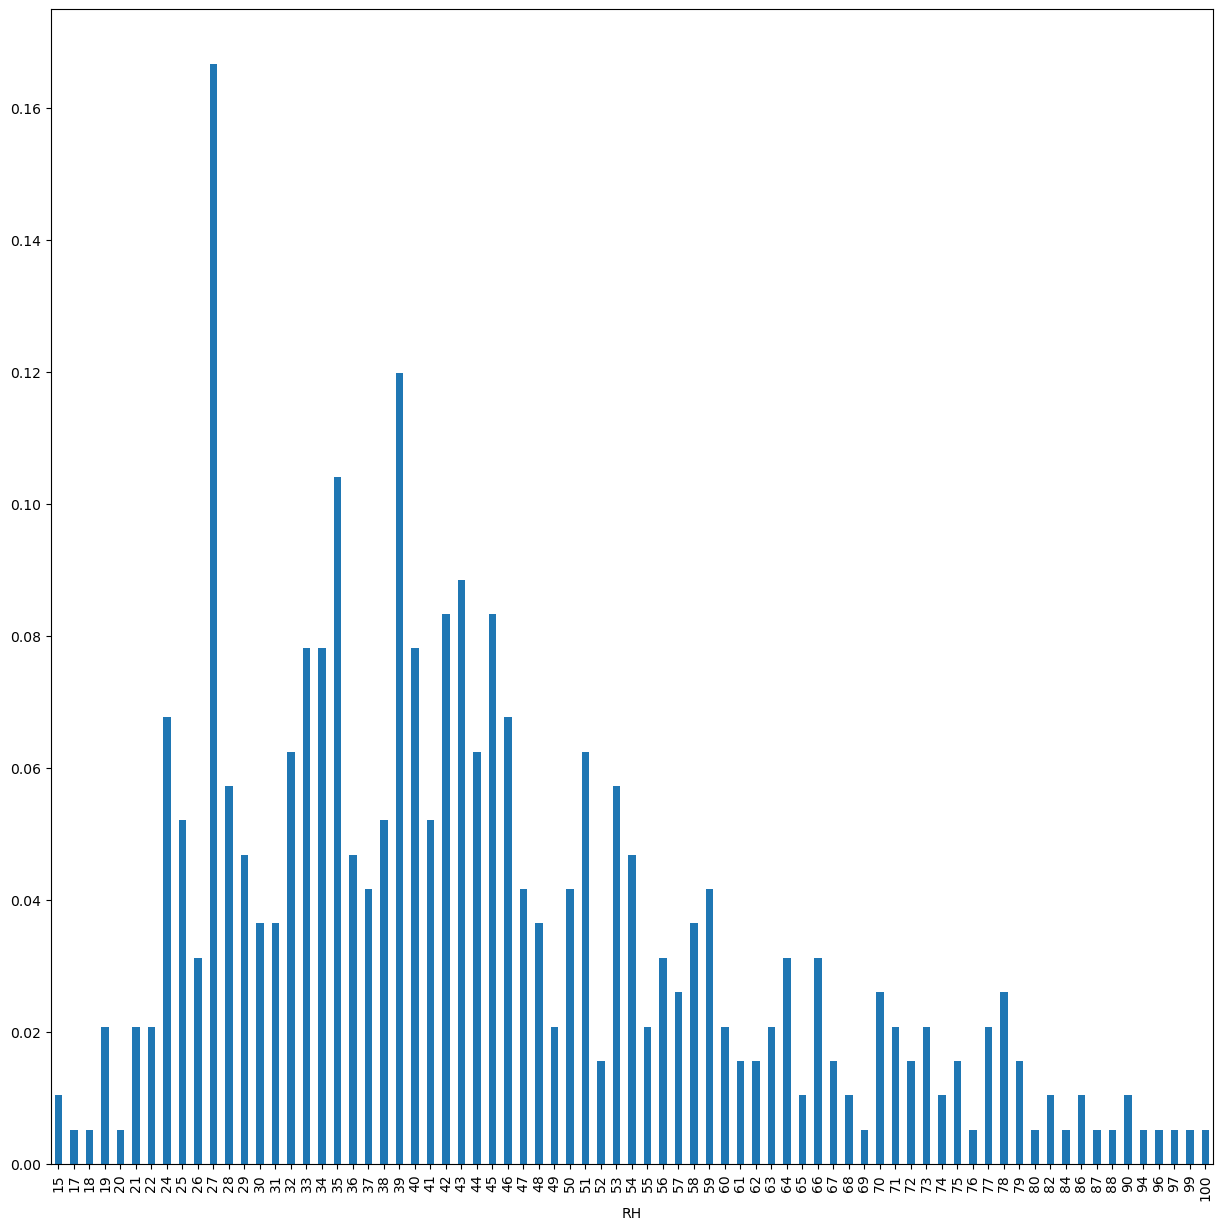

In [23]:
plt.figure(figsize=(15,15))
pd.crosstab(fire['temp'],fire['RH']).mean().plot(kind='bar')

<Axes: xlabel='rain'>

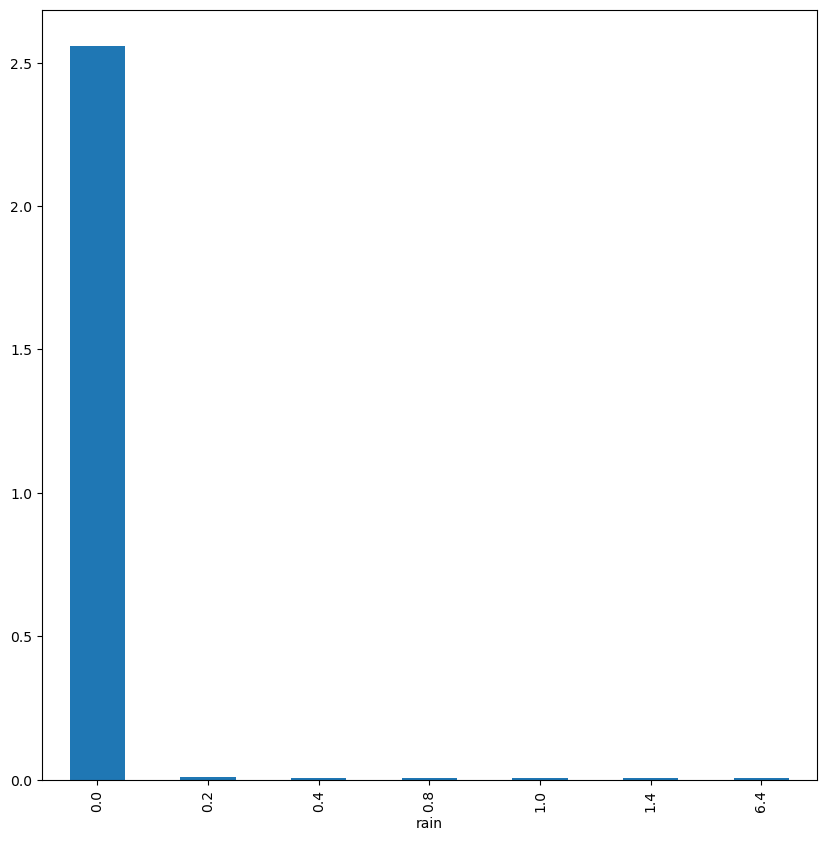

In [24]:
plt.figure(figsize=(10,10))
pd.crosstab(fire['temp'],fire['rain']).mean().plot(kind='bar')

In [25]:
X=fire.iloc[:,:10]
y=fire.iloc[:,10]

Build the model

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr_model = LogisticRegression()

In [28]:
lr_model.fit(X,y)

C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
lr_model.coef_

array([[-0.26235004, -0.00758468,  0.01938391, -0.00538182,  0.00240884,
         0.00866186,  0.00696364,  0.0074472 , -0.00786751, -0.13789474]])

In [30]:
X.columns.values

array(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain'], dtype=object)

In [31]:
coefficients = lr_model.coef_.reshape(1, -1)
model_params = pd.DataFrame(coefficients, columns=X.columns.values, index=['LogisticReg'])
model_params

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
LogisticReg,-0.26235,-0.007585,0.019384,-0.005382,0.002409,0.008662,0.006964,0.007447,-0.007868,-0.137895


Elastic Net

In [32]:
from sklearn.linear_model import ElasticNet

In [33]:
el_model = ElasticNet(alpha=1.0, l1_ratio=1.0)

In [34]:
el_model.fit(X,y)

ElasticNet(l1_ratio=1.0)

In [35]:
el_model.coef_

array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -8.60507684e-05,
       -5.03523694e-05,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00])

In [36]:
coefficients_el = el_model.coef_.reshape(1, -1)
coefficients_el_rounded = [round(coef, 5) for coef in coefficients_el[0]]

In [37]:
model_params.loc['ElasticReg'] = coefficients_el_rounded
model_params

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
LogisticReg,-0.26235,-0.007585,0.019384,-0.005382,0.002409,0.008662,0.006964,0.007447,-0.007868,-0.137895
ElasticReg,-0.00000,-0.000000,-0.000000,-0.000090,-0.000050,0.000000,-0.000000,0.000000,-0.000000,-0.000000


PCA

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca=PCA(n_components=10)
fire_pca_values=pca.fit_transform(fire)
fire_pca_values

array([[ 4.61560481e+02, -2.17780993e+00,  6.32790258e+00, ...,
        -1.67577840e+00, -1.01705860e+00, -1.98787870e-01],
       [-1.05898461e+02, -9.60164250e+01, -6.17405152e+00, ...,
         2.54069925e+00,  1.02843711e+00, -2.61944089e-01],
       [-1.24849237e+02, -9.10895216e+01, -5.58385833e+00, ...,
         2.49728830e+00,  9.71707823e-01, -2.69152338e-01],
       ...,
       [-1.06039380e+02, -7.29134213e+01,  2.96135790e+01, ...,
        -4.07271819e+00, -1.01654673e+00,  7.75667414e-01],
       [-7.21398767e+01,  2.30746000e+01, -4.61657332e+00, ...,
        -5.32240513e-01,  2.69426060e-01, -3.09043831e-01],
       [ 4.53375628e+02, -2.83901945e+01, -1.16874471e+01, ...,
        -9.95002294e-01,  6.87417296e+00, -6.56998623e-01]])

In [40]:
fire_var = pca.explained_variance_ratio_
fire_var

array([9.62914131e-01, 3.19869180e-02, 4.15291242e-03, 4.56183046e-04,
       2.14058909e-04, 1.48068335e-04, 6.81702961e-05, 4.18150222e-05,
       1.35656118e-05, 2.89315037e-06])

In [41]:
np.cumsum(fire_var)

array([0.96291413, 0.99490105, 0.99905396, 0.99951014, 0.9997242 ,
       0.99987227, 0.99994044, 0.99998226, 0.99999582, 0.99999872])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [44]:
model=SVC(C=0.65,gamma=0.01,kernel='rbf')

In [45]:
model.fit(X,y)

SVC(C=0.65, gamma=0.01)

In [46]:
train_pred=model.predict(X_train)

In [47]:
confusion_matrix(y_train,train_pred)

array([[ 13,  94],
       [  0, 291]], dtype=int64)

<Axes: >

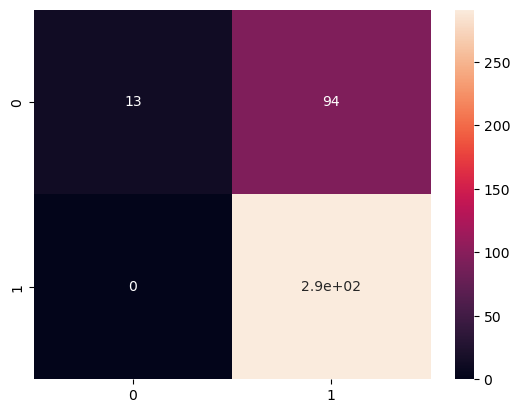

In [48]:
sns.heatmap(confusion_matrix(y_train,train_pred),annot=True)

In [49]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      0.12      0.22       107
           1       0.76      1.00      0.86       291

    accuracy                           0.76       398
   macro avg       0.88      0.56      0.54       398
weighted avg       0.82      0.76      0.69       398



In [50]:
test_pred=model.predict(X_test)

In [51]:
confusion_matrix(y_test,test_pred)

array([[ 5, 21],
       [ 0, 74]], dtype=int64)

<Axes: >

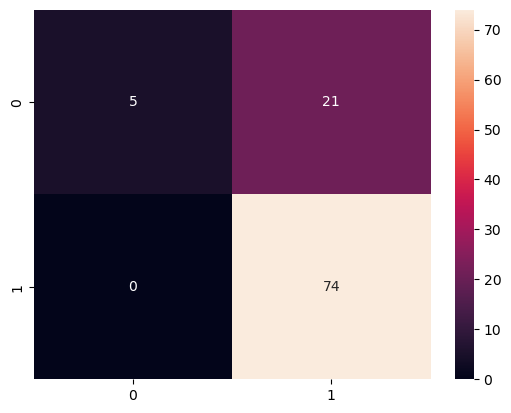

In [52]:
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True)

In [53]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.19      0.32        26
           1       0.78      1.00      0.88        74

    accuracy                           0.79       100
   macro avg       0.89      0.60      0.60       100
weighted avg       0.84      0.79      0.73       100



In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
smote=SMOTE(sampling_strategy='auto')

In [56]:
X1,y1=smote.fit_resample(X,y)

In [57]:
model.fit(X1,y1)

SVC(C=0.65, gamma=0.01)

In [58]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [59]:
train_pred1=model.predict(X1_train)

In [60]:
confusion_matrix(y1_train,train_pred1)

array([[270,  30],
       [ 35, 249]], dtype=int64)

In [61]:
print(classification_report(y1_train,train_pred1))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       300
           1       0.89      0.88      0.88       284

    accuracy                           0.89       584
   macro avg       0.89      0.89      0.89       584
weighted avg       0.89      0.89      0.89       584



In [62]:
model=SVC(probability=True)
model.fit(X1,y1)
train_proba=model.predict_proba(X_train)

In [63]:
train_proba[:,1]

array([0.5       , 0.5       , 0.5       , 0.49115006, 0.4894679 ,
       0.51808737, 0.48883676, 0.48724392, 0.5       , 0.49229858,
       0.49266536, 0.49427693, 0.48987991, 0.5       , 0.5       ,
       0.5       , 0.5       , 0.49144929, 0.5       , 0.5       ,
       0.48675304, 0.48524036, 0.49485063, 0.51644798, 0.49150367,
       0.49447076, 0.5       , 0.51841843, 0.49496487, 0.5       ,
       0.48965109, 0.51831177, 0.49385538, 0.5       , 0.5       ,
       0.51842611, 0.49328741, 0.51832208, 0.48870747, 0.5       ,
       0.50821754, 0.49446759, 0.5       , 0.5       , 0.49308993,
       0.5       , 0.5       , 0.51836513, 0.49374965, 0.51840923,
       0.50685791, 0.48830283, 0.51854273, 0.50557215, 0.48732699,
       0.51839346, 0.49401733, 0.49161615, 0.49307538, 0.49029835,
       0.5       , 0.51833691, 0.4933528 , 0.5       , 0.51838898,
       0.51844533, 0.5       , 0.51836323, 0.5       , 0.5       ,
       0.51841931, 0.51830311, 0.5       , 0.51840953, 0.49213

In [64]:
fpr,tpr,thresh=roc_curve(y_train,train_proba[:,1])

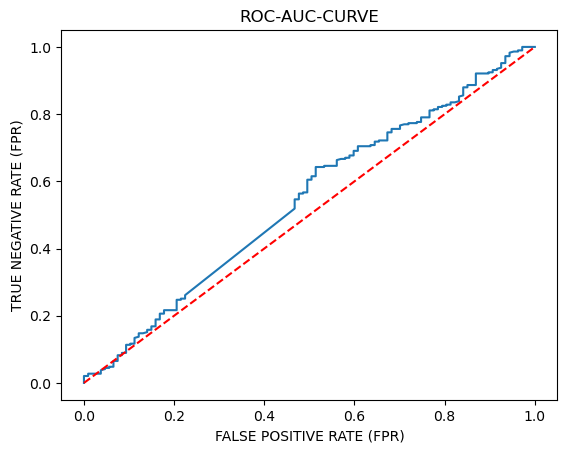

In [65]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC-AUC-CURVE')
plt.xlabel('FALSE POSITIVE RATE (FPR)')
plt.ylabel('TRUE NEGATIVE RATE (FPR)')
plt.show()

In [66]:
roc_auc_score(y1_train,train_pred1)

0.8883802816901408

In [67]:
test_pred=model.predict(X1_test)

In [69]:
confusion_matrix(y1_test,test_pred)

array([[53, 12],
       [63, 18]], dtype=int64)

In [72]:
print(classification_report(y1_test,test_pred))

              precision    recall  f1-score   support

           0       0.46      0.82      0.59        65
           1       0.60      0.22      0.32        81

    accuracy                           0.49       146
   macro avg       0.53      0.52      0.45       146
weighted avg       0.54      0.49      0.44       146



In [73]:
model=SVC(probability=True)
model.fit(X1,y1)
test_proba=model.predict_proba(X1_test)

In [74]:
test_proba[:,1]

array([0.48123253, 0.53313525, 0.46812286, 0.45593451, 0.46767614,
       0.55449442, 0.47950605, 0.48419538, 0.48663918, 0.47174103,
       0.46606241, 0.48490519, 0.48967605, 0.45691632, 0.48798428,
       0.46686735, 0.49162163, 0.4801205 , 0.47078839, 0.488116  ,
       0.47639917, 0.5727668 , 0.49395808, 0.4693829 , 0.4668894 ,
       0.46042229, 0.46766659, 0.57268547, 0.57096222, 0.45257597,
       0.46682223, 0.46722746, 0.46435219, 0.47586566, 0.57128284,
       0.4759697 , 0.45186404, 0.47253678, 0.48213892, 0.45070229,
       0.45593451, 0.45456874, 0.47835137, 0.48279615, 0.57191252,
       0.51813869, 0.47692571, 0.47539319, 0.46920663, 0.48092421,
       0.47688544, 0.57244853, 0.57214061, 0.57275918, 0.47108971,
       0.48921567, 0.45321685, 0.54704118, 0.54696538, 0.57252704,
       0.48456835, 0.49044474, 0.48125591, 0.48214882, 0.4712158 ,
       0.46767641, 0.48193334, 0.47260488, 0.50865024, 0.57215235,
       0.46230005, 0.46639425, 0.47076627, 0.49264906, 0.45548

In [75]:
fpr,tpr,thresh=roc_curve(y1_test,test_proba[:,1])

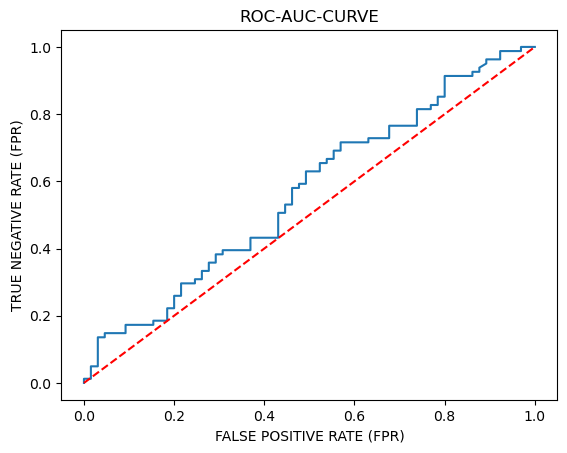

In [76]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC-AUC-CURVE')
plt.xlabel('FALSE POSITIVE RATE (FPR)')
plt.ylabel('TRUE NEGATIVE RATE (FPR)')
plt.show()

In [77]:
roc_auc_score(y1_test,test_pred)

0.5188034188034188

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
pgrid=[{'C':[0.4,0.45,0.5,0.55,0.6,0.65],'gamma':[0.1,0.01,0.001]}]

In [80]:
grid=GridSearchCV(model,param_grid=pgrid,cv=10)

In [81]:
grid.fit(X1,y1)

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid=[{'C': [0.4, 0.45, 0.5, 0.55, 0.6, 0.65],
                          'gamma': [0.1, 0.01, 0.001]}])

In [83]:
grid.best_params_


{'C': 0.65, 'gamma': 0.01}

In [84]:
from sklearn.manifold import TSNE

In [85]:
tsne=TSNE(n_components=2)

In [86]:
tsne_comps=tsne.fit_transform(X1)
tsne_comps

array([[ 22.066216  , -17.33745   ],
       [ -0.35583416, -29.839088  ],
       [ -1.3436618 , -30.664183  ],
       ...,
       [-11.45086   ,  29.668964  ],
       [-19.497286  ,   4.9076557 ],
       [-16.106865  ,   4.442273  ]], dtype=float32)

Visualization

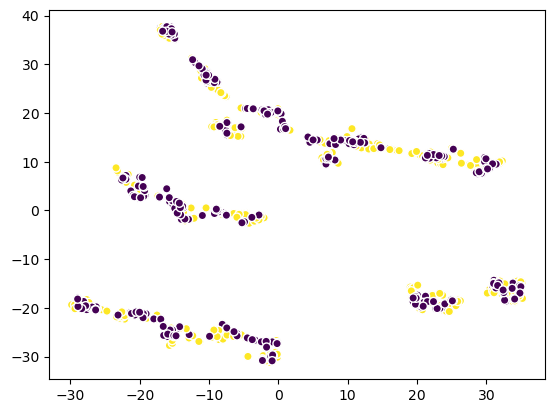

In [87]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y1,cmap='viridis',edgecolors='white')
plt.show()